In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Import libraries and dataset


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

In [3]:
train_df = pd.read_csv('../input/spaceship-titanic/'+"train.csv")
test_df = pd.read_csv('../input/spaceship-titanic/'+"test.csv")
print('Train shape:',train_df.shape)
print('Test shape:',test_df.shape)

Train shape: (8693, 14)
Test shape: (4277, 13)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
train_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [7]:
test_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


# EDA & Filling Null Values

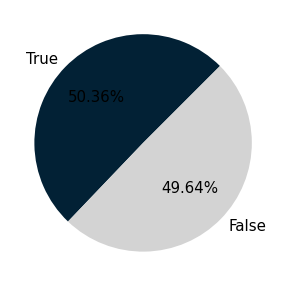

In [8]:
plt.figure(figsize=(5,5))
colors = ["#022135","lightgray"]
labels = train_df["Transported"].value_counts().index
plt.pie(train_df['Transported'].value_counts().to_list(),labels = labels, autopct='%.2f%%',
             textprops=dict(color="black", fontsize=15),colors = colors,startangle=45)
plt.show()

In [9]:
df = pd.concat([train_df,test_df],ignore_index= True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.0,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.0,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.0,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.0,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.0,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.0,24133.0


In [11]:
df.describe(include=['O']).T

,count,unique,top,freq
PassengerId,12970,12970,0001_01,1
HomePlanet,12682,3,Earth,6865
CryoSleep,12660,2,False,8079
Cabin,12671,9825,G/734/S,8
Destination,12696,3,TRAPPIST-1e,8871
VIP,12674,2,False,12401
Name,12676,12629,Carry Contrevins,2
Transported,8693,2,True,4378


In [12]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

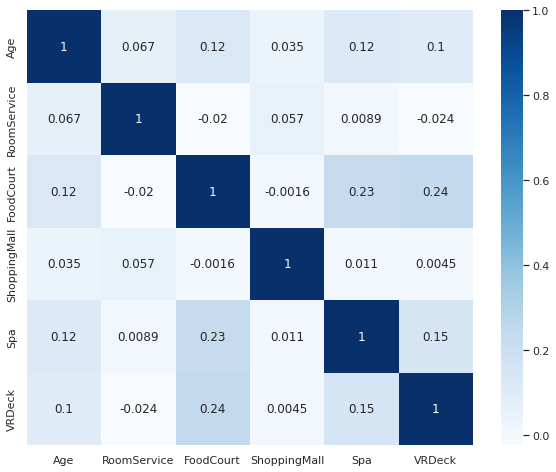

In [13]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True,cmap = "Blues")
plt.show()

In [14]:
df['Age'].describe()

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

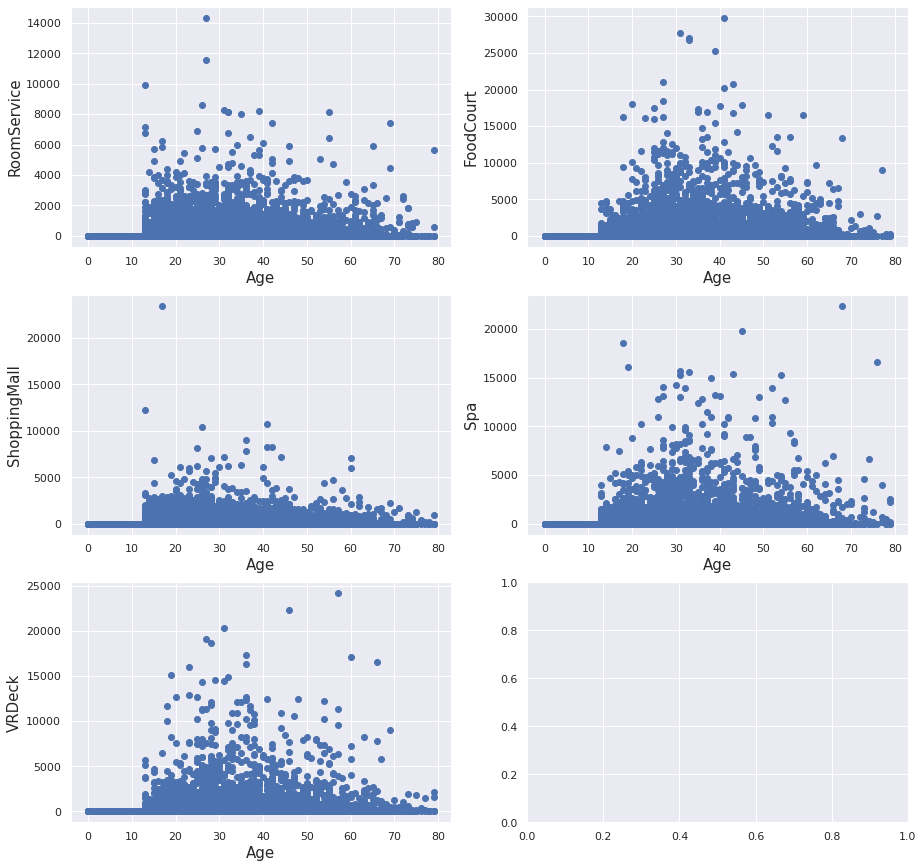

In [15]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
y = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in range(3):
    for j in range(2):
        if 2*i+j <5:
            ax[i,j].scatter(df['Age'],df[y[2*i+j]])
            ax[i,j].set_xlabel('Age',fontsize=15)
            ax[i,j].set_ylabel(y[2*i+j],fontsize=15)
plt.show()


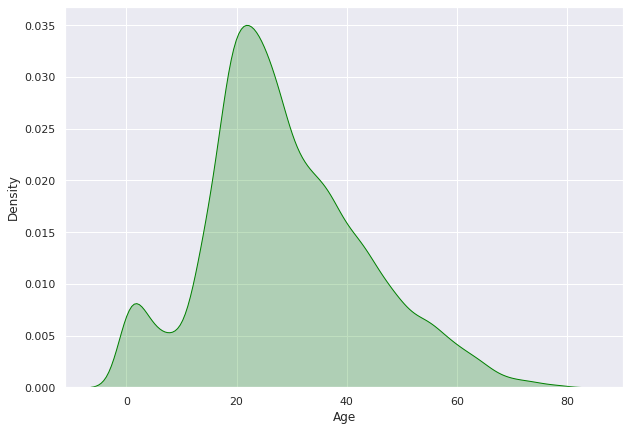

In [16]:
plt.figure(figsize=(10,7))
sns.kdeplot(x = df['Age'],shade=True,color='Green')
plt.show()

In [17]:
mean = df['Age'].mean()
std = df['Age'].std()
is_null = df['Age'].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
age_slice = df['Age'].copy()
age_slice[np.isnan(age_slice)] = rand_age
df['Age'] = age_slice
df['Age'] = df['Age'].astype(int)

df['Age'].isnull().sum()

0

In [18]:
print(df['CryoSleep'].value_counts())
print(df['VIP'].value_counts())

False    8079
True     4581
Name: CryoSleep, dtype: int64
False    12401
True       273
Name: VIP, dtype: int64


In [19]:
df['CryoSleep'] = df['CryoSleep'].fillna(False)
df['VIP'] = df['VIP'].fillna(False)

In [20]:
df['RoomService'] = df['RoomService'].fillna(0)
df['FoodCourt'] = df['FoodCourt'].fillna(0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['VRDeck'] = df['VRDeck'].fillna(0)

In [21]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep          0
Cabin            299
Destination      274
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
dtype: int64

In [22]:
df['Total_cost'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df['Total_cost'].describe()

count    12970.000000
mean      1433.221049
std       2807.369708
min          0.000000
25%          0.000000
50%        716.000000
75%       1442.000000
max      35987.000000
Name: Total_cost, dtype: float64

In [23]:
df['HomePlanet'].describe()

count     12682
unique        3
top       Earth
freq       6865
Name: HomePlanet, dtype: object

In [24]:

edg= pd.qcut(df['Total_cost'],6,duplicates = 'drop').unique()
edg

[(-0.001, 716.0], (716.0, 991.0], (2347.0, 35987.0], (991.0, 2347.0]]
Categories (4, interval[float64, right]): [(-0.001, 716.0] < (716.0, 991.0] < (991.0, 2347.0] < (2347.0, 35987.0]]

In [25]:
edges = [-1,716,2347,35987]
df['cost_range'] = pd.cut(df['Total_cost'],edges,labels = [1,2,3])

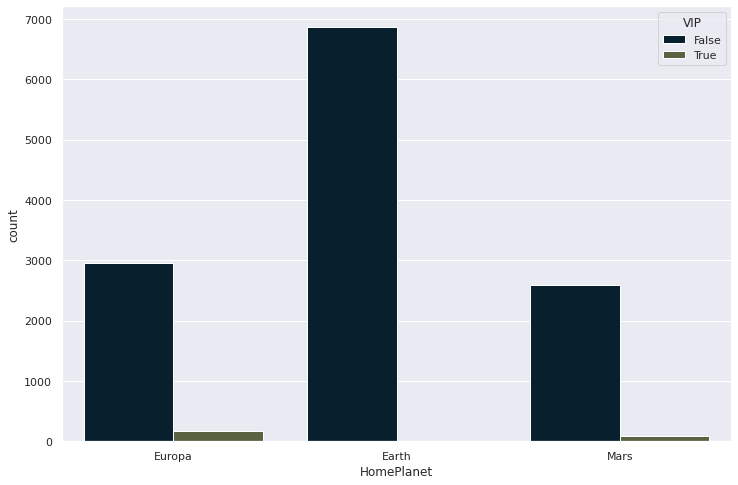

In [26]:
plt.figure(figsize=(12,8))
color = ["#022133", "#5c693b"]
sns.countplot(x='HomePlanet',hue = 'VIP',data=df, palette = color)
plt.show()

In [27]:
df.loc[df['VIP']==False,'HomePlanet'] = df['HomePlanet'].fillna('Earth')
df.loc[df['VIP']==True,'HomePlanet'] = df['HomePlanet'].fillna('Europa')
df['HomePlanet'].isnull().sum()

0

In [28]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination      274
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
Total_cost         0
cost_range         0
dtype: int64

In [29]:
df['Destination'].describe()

count           12696
unique              3
top       TRAPPIST-1e
freq             8871
Name: Destination, dtype: object

In [30]:
df['Destination']=df['Destination'].fillna('TRAPPIST-1e')

In [31]:
df[['c_deck','c_num','c_side']] = df['Cabin'].str.split('/',expand = True)

In [32]:
df[['c_deck','c_num','c_side']].describe()

,c_deck,c_num,c_side
count,12671,12671,12671
unique,8,1894,2
top,F,82,S
freq,4239,34,6381


In [33]:
df[['c_deck','c_num','c_side']].isnull().sum()

c_deck    299
c_num     299
c_side    299
dtype: int64

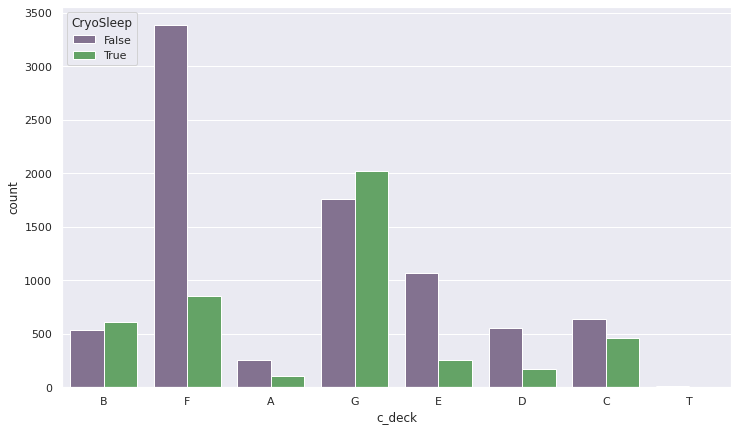

In [34]:
plt.figure(figsize = (12,7))
color = ['#836d95','#59ae5c']
sns.countplot(x='c_deck',hue= 'CryoSleep',data=df,palette = color)
plt.show()

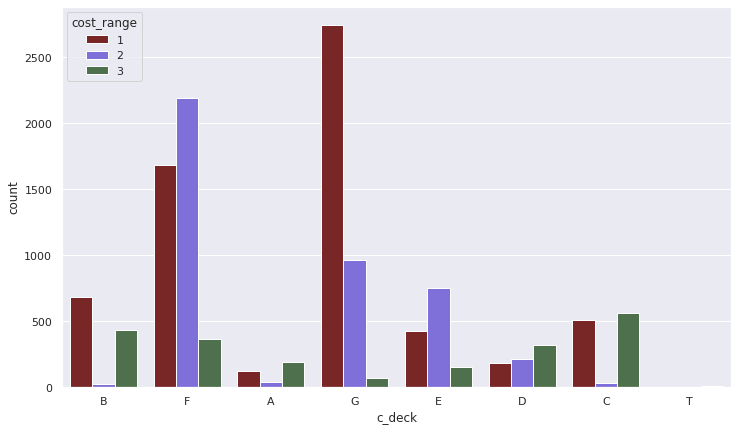

In [35]:
plt.figure(figsize = (12,7))
color = ['#871818','#735eeb','#497646']
sns.countplot(x='c_deck',hue= 'cost_range',data=df,palette = color)
plt.show()

In [36]:
df.loc[df['CryoSleep']==True,'c_deck'].isnull().sum()

119

In [37]:
df.loc[df['cost_range'] == 1,'c_deck'] = df['c_deck'].fillna('G')
df.loc[df['cost_range'] == 2,'c_deck'] = df['c_deck'].fillna('F')
df.loc[df['cost_range'] == 3,'c_deck'] = df['c_deck'].fillna('C')
df['c_deck'].isnull().sum()

0

In [38]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
Total_cost         0
cost_range         0
c_deck             0
c_num            299
c_side           299
dtype: int64

In [39]:
df['c_num'].dropna().astype('int64').describe()

count    12671.000000
mean       603.601926
std        512.891926
min          0.000000
25%        170.000000
50%        431.000000
75%       1008.000000
max       1894.000000
Name: c_num, dtype: float64

In [40]:
df['c_num']= df['c_num'].fillna('431')

In [41]:
df['c_num'] = df['c_num'].astype('int64')

In [42]:
edg = pd.qcut(df['c_num'],4,duplicates = 'drop').unique()
edg

[(-0.001, 175.0], (175.0, 431.0], (431.0, 992.0], (992.0, 1894.0]]
Categories (4, interval[float64, right]): [(-0.001, 175.0] < (175.0, 431.0] < (431.0, 992.0] < (992.0, 1894.0]]

In [43]:
edges = [-1,175.0,431.0,992.0,1894.0]
df['c_num_range'] = pd.cut(df['c_num'],edges)

In [44]:
df['c_num_range'].value_counts()

(175.0, 431.0]     3384
(-1.0, 175.0]      3252
(992.0, 1894.0]    3241
(431.0, 992.0]     3093
Name: c_num_range, dtype: int64

In [45]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
Total_cost         0
cost_range         0
c_deck             0
c_num              0
c_side           299
c_num_range        0
dtype: int64

In [46]:
df['c_side'].value_counts()

S    6381
P    6290
Name: c_side, dtype: int64

In [47]:
df['c_side']= df['c_side'].fillna('S')

# Feature Engineering

In [48]:
df['luxury_cost'] = df['ShoppingMall'] + df ['Spa'] + df['VRDeck']
df['regular_cost'] = df['FoodCourt'] + df['RoomService']

In [49]:
cost_list = ['ShoppingMall','Spa','VRDeck','FoodCourt','RoomService']
for i in cost_list:
    ed = pd.qcut(df[i],6,duplicates = 'drop').unique()
    print(i,' ',ed)


ShoppingMall   [(-0.001, 1.0], (1.0, 199.0], (199.0, 23492.0]]
Categories (3, interval[float64, right]): [(-0.001, 1.0] < (1.0, 199.0] < (199.0, 23492.0]]
Spa   [(-0.001, 3.0], (304.0, 22408.0], (3.0, 304.0]]
Categories (3, interval[float64, right]): [(-0.001, 3.0] < (3.0, 304.0] < (304.0, 22408.0]]
VRDeck   [(-0.001, 1.0], (1.0, 283.0], (283.0, 24133.0]]
Categories (3, interval[float64, right]): [(-0.001, 1.0] < (1.0, 283.0] < (283.0, 24133.0]]
FoodCourt   [(-0.001, 2.0], (2.0, 463.5], (463.5, 29813.0]]
Categories (3, interval[float64, right]): [(-0.001, 2.0] < (2.0, 463.5] < (463.5, 29813.0]]
RoomService   [(-0.001, 1.0], (1.0, 332.5], (332.5, 14327.0]]
Categories (3, interval[float64, right]): [(-0.001, 1.0] < (1.0, 332.5] < (332.5, 14327.0]]


In [50]:
df['SM_range'] = pd.cut(df['ShoppingMall'],[-1,1,199.0,23492.0])
df['SM_range'].value_counts()

(-1.0, 1.0]         8862
(199.0, 23492.0]    2160
(1.0, 199.0]        1948
Name: SM_range, dtype: int64

In [51]:
df['Spa_range'] = pd.cut(df['Spa'],[-1,3,304,22408])
df['Spa_range'].value_counts()

(-1, 3]         8667
(304, 22408]    2158
(3, 304]        2145
Name: Spa_range, dtype: int64

In [52]:
df['VD_range'] = pd.cut(df['VRDeck'],[-1,1,283,24133])
df['VD_range'].value_counts()

(-1, 1]         8731
(283, 24133]    2161
(1, 283]        2078
Name: VD_range, dtype: int64

In [53]:
df['FC_range'] = pd.cut(df['FoodCourt'],[-1,2,463.5,29813])
df['FC_range'].value_counts()

(-1.0, 2.0]         8715
(463.5, 29813.0]    2162
(2.0, 463.5]        2093
Name: FC_range, dtype: int64

In [54]:
df['RS_range'] = pd.cut(df['RoomService'],[-1,1,332,14327])
df['RS_range'].value_counts()

(-1, 1]         8751
(332, 14327]    2162
(1, 332]        2057
Name: RS_range, dtype: int64

In [55]:
sup = ['luxury_cost','regular_cost']
for i in sup:
    ed = pd.qcut(df[i],6,duplicates = 'drop').unique()
    print(i,' ',ed)

luxury_cost   [(-0.001, 36.0], (606.0, 1149.0], (1149.0, 28600.0], (36.0, 606.0]]
Categories (4, interval[float64, right]): [(-0.001, 36.0] < (36.0, 606.0] < (606.0, 1149.0] < (1149.0, 28600.0]]
regular_cost   [(-0.001, 2.0], (2.0, 346.0], (1030.0, 29813.0], (346.0, 1030.0]]
Categories (4, interval[float64, right]): [(-0.001, 2.0] < (2.0, 346.0] < (346.0, 1030.0] < (1030.0, 29813.0]]


In [56]:
df['lc_range'] = pd.cut(df['luxury_cost'],[-1,36,606,1149,28600])
df['lc_range'].value_counts()

(-1, 36]         6496
(606, 1149]      2162
(1149, 28600]    2161
(36, 606]        2151
Name: lc_range, dtype: int64

In [57]:
df['rc_range'] = pd.cut(df['regular_cost'],[-1,2,346,1030,29813])
df['rc_range'].value_counts()

(-1, 2]          6519
(346, 1030]      2165
(1030, 29813]    2157
(2, 346]         2129
Name: rc_range, dtype: int64

In [58]:
df.loc[df['regular_cost'] >= df['luxury_cost'],'reg_lux_ratio'] = 1
df.loc[df['regular_cost'] < df['luxury_cost'],'reg_lux_ratio'] = 0

In [59]:
df['reg_lux_ratio'].value_counts()

1.0    8754
0.0    4216
Name: reg_lux_ratio, dtype: int64

In [60]:
df['FamilyId'] = df['PassengerId'].str.split("_", n=2, expand=True)[0]
df['Family Name'] = df['Name'].str.split(' ', n=2, expand=True)[1]
df = df.set_index(['FamilyId','Family Name'])
df['Family Member'] = 1
df['Family Cost'] = 1
for i in range(df.shape[0]):
    fam_size = df.loc[df.index[i],:].shape[0]
    df.loc[df.index[i],'Family Member'] = fam_size
    fam_cost = df.loc[df.index[i],'Total_cost'].sum()
    df.loc[df.index[i],'Family Cost'] = fam_cost

df = df.reset_index()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2958: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/opt/conda/lib/python3.7/site-packages/IPython/core/async_helpers.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [61]:
df['FamilyId'].describe()

count     12970
unique     9280
top        6499
freq          8
Name: FamilyId, dtype: object

In [62]:
# df = df.set_index(['FamilyId','Family Name'])
# df['Family Cost'] = 1
# for i in range(df.shape[0]):
#     fam_cost = df.loc[df.index[i],'Total_cost'].sum()
#     df.loc[df.index[i],'Family Cost'] = fam_cost
    
# df = df.reset_index()
# df['Family Cost'].describe()    

In [63]:
df.loc[df['Total_cost'] == (df['Family Cost']/df['Family Member']),'total vs fam'] = 1
df.loc[df['Total_cost'] < (df['Family Cost']/df['Family Member']),'total vs fam'] = 0
df.loc[df['Total_cost'] > (df['Family Cost']/df['Family Member']),'total vs fam'] = 2

In [64]:
df['total vs fam'].value_counts()

1.0    8714
0.0    2374
2.0    1882
Name: total vs fam, dtype: int64

In [65]:
df.loc[df['Family Member']==1,'Alone']= 1
df.loc[df['Family Member']>1,'Alone']= 0
df['Alone'] = df['Alone'].astype(int)
df['Alone'].describe()

count    12970.000000
mean         0.600848
std          0.489743
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Alone, dtype: float64

In [66]:
df[['Alone','Family Member']].head(10)

,Alone,Family Member
0,1,1
1,1,1
2,0,2
3,0,2
4,1,1
5,1,1
6,0,2
7,0,2
8,1,1
9,0,3


In [67]:
df['Family Member'].value_counts()

1    7793
2    2684
3    1350
4     556
5     270
6     180
7     105
8      32
Name: Family Member, dtype: int64

In [68]:
fmap = {1:'Small',2:'Small',3:'Small',4:'Medium',5:'Medium',6:'Large',7:'Large',8:'Large'}
df['Family Size'] = df['Family Member'].map(fmap)
df['Family Size'].describe()

count     12970
unique        3
top       Small
freq      11827
Name: Family Size, dtype: object

In [69]:
edges = np.linspace(df['Age'].min()-1,df['Age'].max(),6).astype(int)
df['Age_range'] = pd.cut(df['Age'],edges)
df['Age_range'].value_counts()

(15, 31]    6282
(31, 47]    3452
(-1, 15]    1825
(47, 63]    1212
(63, 79]     199
Name: Age_range, dtype: int64

In [70]:
df.isnull().sum()

FamilyId            0
Family Name       294
PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin             299
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              294
Transported      4277
Total_cost          0
cost_range          0
c_deck              0
c_num               0
c_side              0
c_num_range         0
luxury_cost         0
regular_cost        0
SM_range            0
Spa_range           0
VD_range            0
FC_range            0
RS_range            0
lc_range            0
rc_range            0
reg_lux_ratio       0
Family Member       0
Family Cost         0
total vs fam        0
Alone               0
Family Size         0
Age_range           0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FamilyId       12970 non-null  object  
 1   Family Name    12676 non-null  object  
 2   PassengerId    12970 non-null  object  
 3   HomePlanet     12970 non-null  object  
 4   CryoSleep      12970 non-null  bool    
 5   Cabin          12671 non-null  object  
 6   Destination    12970 non-null  object  
 7   Age            12970 non-null  int64   
 8   VIP            12970 non-null  bool    
 9   RoomService    12970 non-null  float64 
 10  FoodCourt      12970 non-null  float64 
 11  ShoppingMall   12970 non-null  float64 
 12  Spa            12970 non-null  float64 
 13  VRDeck         12970 non-null  float64 
 14  Name           12676 non-null  object  
 15  Transported    8693 non-null   object  
 16  Total_cost     12970 non-null  float64 
 17  cost_range     12970 non-null  

# Model Selection

In [72]:
drop_list = ['Family Name','Cabin','Name','FamilyId','Total_cost','Age',
             'ShoppingMall','Spa','VRDeck','FoodCourt','RoomService',
             'c_num','luxury_cost','regular_cost','Family Cost']
df = df.drop(drop_list,axis=1)
df['total vs fam'] = df['total vs fam'].astype('int64')
df['reg_lux_ratio'] = df['reg_lux_ratio'].astype('int64')

In [73]:
encode = ['HomePlanet','CryoSleep','Destination','VIP',
          'cost_range','c_deck','c_side','c_num_range','SM_range','Spa_range',
          'VD_range','FC_range','RS_range','lc_range','rc_range','Family Size','Age_range']
label = LabelEncoder()
df[encode] = df[encode].apply(label.fit_transform)

In [74]:
df.loc[df['Transported'] == True,'Transported'] = 1
df.loc[df['Transported'] == False,'Transported'] = 0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PassengerId    12970 non-null  object
 1   HomePlanet     12970 non-null  int64 
 2   CryoSleep      12970 non-null  int64 
 3   Destination    12970 non-null  int64 
 4   VIP            12970 non-null  int64 
 5   Transported    8693 non-null   object
 6   cost_range     12970 non-null  int64 
 7   c_deck         12970 non-null  int64 
 8   c_side         12970 non-null  int64 
 9   c_num_range    12970 non-null  int64 
 10  SM_range       12970 non-null  int64 
 11  Spa_range      12970 non-null  int64 
 12  VD_range       12970 non-null  int64 
 13  FC_range       12970 non-null  int64 
 14  RS_range       12970 non-null  int64 
 15  lc_range       12970 non-null  int64 
 16  rc_range       12970 non-null  int64 
 17  reg_lux_ratio  12970 non-null  int64 
 18  Family Member  12970 non-n

In [76]:
train_df = df.loc[:8692]
train_df['Transported'] = train_df['Transported'].astype('int64')
test_df = df.loc[8693:].drop('Transported',axis = 1)
test_pass_id = test_df['PassengerId'].copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
print('Train data: ',train_df.shape)
print('Test_data: ',test_df.shape)

Train data:  (8693, 23)
Test_data:  (4277, 22)


In [78]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PassengerId    8693 non-null   object
 1   HomePlanet     8693 non-null   int64 
 2   CryoSleep      8693 non-null   int64 
 3   Destination    8693 non-null   int64 
 4   VIP            8693 non-null   int64 
 5   Transported    8693 non-null   int64 
 6   cost_range     8693 non-null   int64 
 7   c_deck         8693 non-null   int64 
 8   c_side         8693 non-null   int64 
 9   c_num_range    8693 non-null   int64 
 10  SM_range       8693 non-null   int64 
 11  Spa_range      8693 non-null   int64 
 12  VD_range       8693 non-null   int64 
 13  FC_range       8693 non-null   int64 
 14  RS_range       8693 non-null   int64 
 15  lc_range       8693 non-null   int64 
 16  rc_range       8693 non-null   int64 
 17  reg_lux_ratio  8693 non-null   int64 
 18  Family Member  8693 non-null

In [79]:
drop_col = ['PassengerId']
data = [train_df,test_df]
for dataset in data:
    dataset.drop(columns=drop_col, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
X_train = train_df.drop("Transported", axis=1)
Y_train = train_df["Transported"]
X_test  = test_df

In [81]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
score_random_forest = round(random_forest.score(X_train, Y_train), 3)

In [82]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

score_log = round(logreg.score(X_train, Y_train),3)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [83]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
score_knn = round(knn.score(X_train, Y_train), 3)

In [84]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
score_linear_svc = round(linear_svc.score(X_train, Y_train), 3)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [85]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
score_decision_tree = round(decision_tree.score(X_train, Y_train), 3)

In [86]:
scores = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree','SVC'],
    'Score': [ score_knn, score_log, score_random_forest, score_decision_tree,score_linear_svc]})

scores

,Model,Score
0,KNN,0.852
1,Logistic Regression,0.770
2,Random Forest,0.943
3,Decision Tree,0.943
4,SVC,0.769


In [87]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79195402 0.73448276 0.76436782 0.77330265 0.77560414 0.79171461
 0.81242808 0.78250863 0.78826237 0.77330265]
Mean: 0.7787927727735673
Standard Deviation: 0.01953692456898026


In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [89]:
# leaf_size = list(range(10,30))
# n_neighbors = list(range(1,3))
# p=[1,2]
# min_samples_leaf = list(range(5,10))
# min_samples_split = list(range(10,20))
# criterion = ['gini','entropy','log_loss']

# hyperparameters = dict(criterion=criterion,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)

# rf = RandomForestClassifier(   
#                             n_estimators=200, 
#                             max_features='auto', 
#                             oob_score=True, 
#                             random_state=50, 
#                             n_jobs=-1)


# clf = GridSearchCV(rf, hyperparameters, cv=10)

# best_model = clf.fit(X_train,Y_train)
# #Print The value of best Hyperparameters
# print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
# print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
# print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])

In [90]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances

,importance
feature,
CryoSleep,0.092
c_deck,0.088
lc_range,0.081
c_num_range,0.076
Age_range,0.074
rc_range,0.059
RS_range,0.059
Spa_range,0.057
VD_range,0.047


In [91]:
random_forest = RandomForestClassifier(criterion = 'entropy', 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 16,   
                                       n_estimators=200, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=50, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 79.22 %


In [92]:
# boosting_type = ['gbdt','dart','goss']
# learning_rate = [.1,.13,.15]
# num_leaves = list(range(10,51))
# hyperparameters = dict(boosting_type = boosting_type, learning_rate = learning_rate,
#                        num_leaves = num_leaves)
# lg = lgb.LGBMClassifier()


# clf = GridSearchCV(lg, hyperparameters, cv=10)

# best_model = clf.fit(X_train,Y_train)
# #Print The value of best Hyperparameters
# print('Best boosting_type:', best_model.best_estimator_.get_params()['boosting_type'])
# print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
# print('Best num_leaves:', best_model.best_estimator_.get_params()['num_leaves'])

In [93]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(max_depth = 8,num_leaves=80)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(clf.score(X_train, Y_train))

0.8657540549867709


In [94]:
# from catboost import CatBoostClassifier
# m = CatBoostClassifier(iterations=100000,eval_metric='Accuracy',verbose=5000)
# m.fit(X_train,Y_train)
# Y_pred = m.predict(X_test)

In [95]:
pred_df = pd.DataFrame(columns=['PassengerId', 'Transported'])
pred_df['PassengerId'] = test_pass_id
pred_df['Transported']= Y_prediction
pred_df.head(10)

,PassengerId,Transported
8693,0013_01,1
8694,0018_01,0
8695,0019_01,1
8696,0021_01,1
8697,0023_01,0
8698,0027_01,1
8699,0029_01,1
8700,0032_01,1
8701,0032_02,1
8702,0033_01,1


In [96]:
pred_df.loc[pred_df['Transported'] == 0, 'Transported'] = False
pred_df.loc[pred_df['Transported'] == 1, 'Transported'] = True

In [97]:
pred_df

,PassengerId,Transported
8693,0013_01,True
8694,0018_01,False
8695,0019_01,True
8696,0021_01,True
8697,0023_01,False
...,...,...
12965,9266_02,True
12966,9269_01,False
12967,9271_01,True
12968,9273_01,True


In [98]:
pred_df.to_csv('submission.csv',header = True,index=False)